# Постановка задачи
В начальный момент времени t = 0 по оси x движется материальная точка (МТ) массы m. Известны начальные координата и скорость. Необходимо за наименьшее время привести МТ в состояние покоя в начале координат. 

Приведем задачу к виду задачи теории управления.

Модель задачи составим с помощью 2 закона Ньютона:
$$m\ddot x\;=\;F\; \quad \Rightarrow \quad \left\{\begin{array}{l}\dot x\;=\;v\\\dot v\;=\;\frac Fm\end{array}\right.\quad \Rightarrow \quad \left\{\begin{array}{l}\dot x\;=\;v\\\dot v\;=\;u\end{array}\right.,$$
где u - управляющий параметр, абсолютное значение которого не может превышать $u^\ast$

$
|u| \leq u^\ast.
$

Начальное многообразие - фиксированная точка начальных условий $(x_0, v_0)$:

$
\mathbf{А:} \quad \forall x_0,v_0.
$

Терминальное многообразие - начало координат фазовой плоскости: 

$
\mathbf{B:} \quad \left( x(t_\text{к}), v(t_\text{к}) \right) = (0,0).
$

Функционал задачи - время, за которое система достигает терминального многообразия:

$
\Phi(x(t_\text{к}), t_\text{к}) = -t_\text{к}\rightarrow\underset u{max}
$

# Геометрическое решение

В качестве рабочей гипотезы предположим, что искомое управление $u(t)$ будет всегда принадлежать границе области допустимых управлений, то есть либо $u(t) = u^\ast$, либо $u(t) = -u^\ast$.

### Случай 1
Пусть на некотором интервале $u(t) = u^\ast$, тогда уравнения движения системы:

$
\left\{\begin{array}{l}\dot x\;=\;v\\\dot v\;=\;u^\ast \end{array}\right.
$

имеют решение

$
\left\{\begin{array}{l}x\left(t\right)=\frac{u^\ast t^2}2+v_0t+x_0, \\ v\left(t\right)=u^\ast t+v_0.\end{array}\right.
$

Исключая из системы время, получим уравнение семейства траекторий в фазовой плоскости:

$
x=\frac{\left(v-v_0\right)^2}{2u^\ast}+\frac{(v-v_0)v_0}{u^\ast}+x_0 = \frac{v^2}{2u^\ast} + \left(x_0- \frac{v_0^2}{2u^\ast}\right).
$

Таким образом при $u(t) = u^\ast$ система движется по одной из семейства парабол, графики которых приведены ниже.

In [54]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16

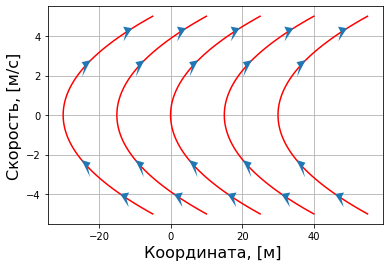

In [55]:
def get_phase_trajectory(initial_conditions, u, v):
    x0 = initial_conditions[0]
    v0 = initial_conditions[1]
    x = v**2 / (2.* u) + (x0 - v0**2 /(2.* u))
    return x, v

def add_arrow(plt, arrow_coords):
    plt.arrow(*arrow_coords, shape='full', lw=0, length_includes_head=True, head_width=0.75, head_length = 2.5, overhang=0.3, zorder=10)
    
def plot_phase_trajectories(u, save_file):
    ic_x = np.array([-30, -15, 0, 15, 30])
    ic_v = ic_x * 0
    
    for i in range(len(ic_x)):
        x, v = get_phase_trajectory([ic_x[i], ic_v[i]], u, np.linspace(-5, 5, 100))
        plt.plot(x, v, 'r-')
        len_v = len(v)
        arrow_indices = [int(len_v / 12), int(1 * len_v / 4), int(3 * len_v / 4), int(11 * len_v / 12)]
        for k in range(len(arrow_indices)):
            arrow_coords = x[arrow_indices[k] + 1], v[arrow_indices[k] + 1], x[arrow_indices[k] + 1] - x[arrow_indices[k]], v[arrow_indices[k] + 1] - v[arrow_indices[k]]
            add_arrow(plt, arrow_coords)
    plt.grid()
    plt.xlabel("Координата, [м] ")
    plt.ylabel("Скорость, [м/с]")
      
    if save_file:
        plt.savefig('phase.pdf')
    else:
        plt.show()
    

u_max = 0.5    
u = u_max   
plot_phase_trajectories(u, False) 

### Случай 2
Пусть на некотором интервале $u(t) = -u^\ast$, тогда решение уравнений движения системы запишется так же как и для Случая 1, однако на фазовой плоскости их изображение будет представлено семейством парабол, ветви которых направлены в обратную сторону (поскольку коэффициент при $v^2$ меняет знак).

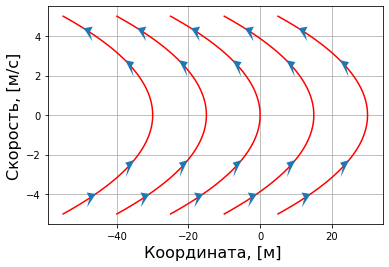

In [56]:
u = -u_max
plot_phase_trajectories(u, True) 

Таким образом, движение системы происходит по траекториям одного из двух семесйств парабол. Параболы, ветви которых направлены вправо, соответствуют u = +$u^\ast$. Параболы, ветви которых направлены влево, соответствуют u = -$u^\ast$.

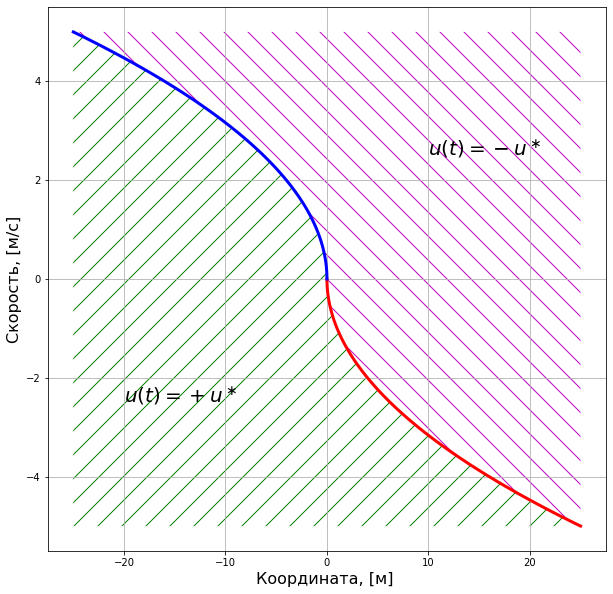

In [57]:
fig = plt.figure(figsize=(10, 10))
v0_limit = 5
x_plus, v_plus = get_phase_trajectory([v0_limit**2 / (2 * u_max), -5], u_max, np.linspace(-v0_limit, 0, 100))
x_minus, v_minus = get_phase_trajectory([-v0_limit**2 / (2 * u_max), -5], -u_max, np.linspace(0, v0_limit, 100))

v_bottom_minus = -np.ones(len(v_minus)) * v0_limit
v_bottom_plus = -np.ones(len(v_plus)) * v0_limit
v_top_minus = np.ones(len(v_minus)) * v0_limit
v_top_plus = np.ones(len(v_plus)) * v0_limit

plt.plot(x_plus, v_plus, color='red', linewidth = 3)
plt.plot(x_minus, v_minus, color='blue', linewidth = 3)
plt.fill_between(x_minus, v_bottom_minus, v_minus, facecolor="none", hatch="/", edgecolor="g", linewidth=0.0)
plt.fill_between(x_plus, v_bottom_plus, v_plus, facecolor="none", hatch="/", edgecolor="g", linewidth=0.0)
plt.fill_between(x_minus, v_minus, v_top_minus, facecolor="none", hatch="\\", edgecolor="m", linewidth=0.0)
plt.fill_between(x_plus, v_plus, v_top_plus, facecolor="none", hatch="\\", edgecolor="m", linewidth=0.0)
plt.text(10, 2.5, r'$u(t) = -u^\ast$', fontsize=20)
plt.text(-20, -2.5, r'$u(t) = +u^\ast$', fontsize=20)
plt.grid(True)
plt.xlabel("Координата, [м] ")
plt.ylabel("Скорость, [м/с]")
plt.show()

Если нам повезёт, точка начальных условий сразу попадёт на параболу, ведущую в начало координат (синяя ветвь с отрицательным управлением $x=-\frac{v^2}{2u^\ast}$ или красная ветвь с положительным управлением $x=\frac{v^2}{2u^\ast}$). 

В противном случае, мы всегда можем выбрать начальную траекторию, пересекающуюся с одной из ветвей, ведущих в начало координат и переключить управление в точке пересечения.

Объединение синей и красной ветвей дели всю фазовую плоскость на две области. В верхней области любая точка начальных условий требует выбора $u(t) = -u^\ast$ на первом участке траектории, в нижней области - $u(t) = u^\ast$. При пересечении границы между областями, знак управления следует изменить, что приведёт к движению по ветви параболы, ведущей в начало координат.

Таким образом, закон управления строится объединением двух участков, на которых управление идёт по границе разрешённых значений и при смене участка меняет знак. Такой алгоритм управления в англоязычной лдитературе получил название "bang-bang-control"

Отметим, что для задач оптимального управления с терминальным функционалом, не зависящим от управляющих параметров, и моделью линейной по u, "bang-bang" управление довольно распространённый вид решения.

In [58]:
import math as m
# Класс, реализующий аналитическое решение
class Analytical_Solution:
    def __init__(self, x0, v0, u_max):
        self.x0 = x0
        self.v0 = v0
        self.u_max = u_max
        self.starting_zone = self.define_starting_zone()
        self.define_switch_time()

    # 1 - верхняя правая область
    # 2 - нижняя левая область
    def define_starting_zone(self):
        x_characteristic = self.v0 ** 2 / (2 * self.u_max)
        if self.x0 > x_characteristic:
            return 1
        if self.v0 > 0 and self.x0 > -x_characteristic:
            return 1
        return 2

    # Теперь находим пересечение двух парабол: одна из которых начальная, 
    # другая проходит через центр фазовой плоскости
    # Определяем время пересечения - в этот момент нужно будет поменять знак u
    # А также время, за которое мы достигнем точки (0,0)
    def define_switch_time(self):
        if self.starting_zone == 1:
            vel = -m.sqrt(2) * m.sqrt(2 * self.u_max * self.x0 + self.v0 ** 2) / 2
            self.switch_time = (vel - self.v0) / (-self.u_max)
            self.full_time = self.switch_time + abs(vel/self.u_max)
        if self.starting_zone == 2:
            vel = m.sqrt(2) * m.sqrt(-2 * self.u_max * self.x0 + self.v0 ** 2) / 2
            self.switch_time = (vel - self.v0) / self.u_max
            self.full_time = self.switch_time + abs(vel / self.u_max)

    # Функция управления
    def analitic_u(self, t):
        if self.starting_zone == 1:
            if t < self.switch_time:
                return -self.u_max
            else:
                return self.u_max
        if self.starting_zone == 2:
            if t < self.switch_time:
                return self.u_max
            else:
                return -self.u_max
                
    # Вектор правой части системы управления
    def f(self, y, t):
        y1, y2 = y
        return [y2, self.analitic_u(t)]

Задание начальных условий и $u^*$:

In [59]:
x0, v0 = -1, 2
u_max = 0.5

# Ищем решение аналитически
a_sol = Analytical_Solution(x0, v0, u_max)

# Можно посмотреть за какое время мы придем в точку (0, 0)
round(a_sol.full_time, 2), round(a_sol.switch_time, 2)

(8.9, 6.45)

In [60]:
# Теперь решаем дифф. ур. нашей системы, подавая туда функцию управления, вычисленную аналитически
t = np.linspace(0, float(a_sol.full_time), 1000)  
y0 = [x0, v0]  
w = odeint(a_sol.f, y0, t)  # solve eq.
y1 = w[:, 0]
y2 = w[:, 1]

u_sol = np.zeros(len(t))

for i in range(len(t)):
    u_sol[i] = a_sol.analitic_u(t[i])

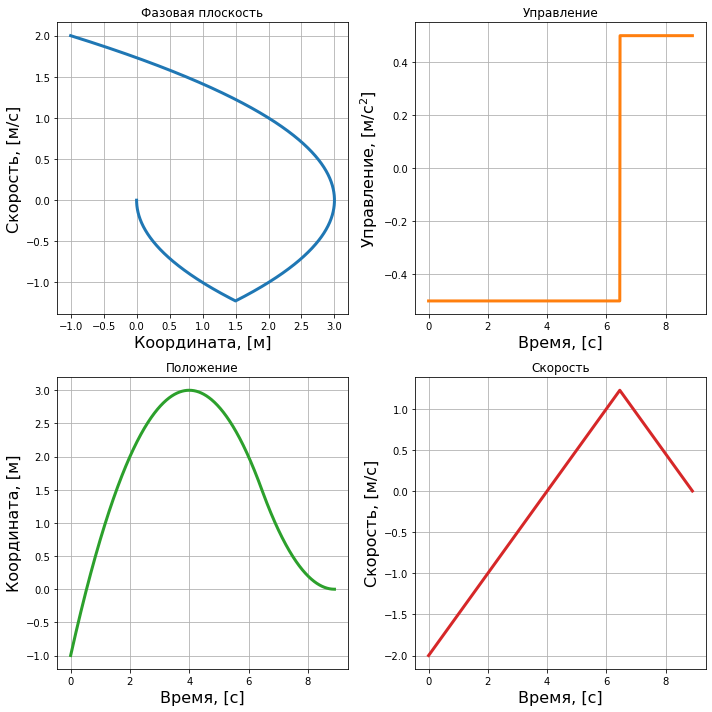

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(y1, y2, linewidth = 3)
axs[0, 0].set_title('Фазовая плоскость')
axs[0, 1].plot(t, u_sol, 'tab:orange', linewidth = 3)
axs[0, 1].set_title('Управление')
axs[1, 0].plot(t, y1, 'tab:green', linewidth = 3)
axs[1, 0].set_title('Положение')
axs[1, 1].plot(t, -y2, 'tab:red', linewidth = 3)
axs[1, 1].set_title('Скорость')

for ax in axs.flat:
    ax.grid()

axs[0, 0].set_xlabel("Координата, [м]")
axs[0, 0].set_ylabel("Скорость, [м/с]")
axs[0, 1].set_xlabel("Время, [с]")
axs[0, 1].set_ylabel("Управление, [м/с$^2$]")
axs[1, 0].set_xlabel("Время, [с]")
axs[1, 0].set_ylabel("Координата, [м]")
axs[1, 1].set_xlabel("Время, [с]")
axs[1, 1].set_ylabel("Скорость, [м/с]")

plt.tight_layout()

# Другой закон управления для сравнения

Для сравнения, попробуем применить к задаче ещё один распространенный подход к построению закона управления - управление по ошибке. Будем вычислять управление в каждый момент времени как сумму двух слагаемых:
- слагаемое пропорциональное ошибке положения точки $- k_p \cdot x$, где $k_p$ - некоторый настраиваемый коэффициент;
- слагаемое пропорциональное ошибке скорости $- k_d \cdot v$, где $k_d$ - некоторый настраиваемый коэффициент.

Таким образом, закон управления (так называемый ПД-регулятор, П - управление пропорциональное ошибке положения, Д - управление пропорциональное производной ошибки положения):

$
u(t) = - k_p \cdot x - k_d \cdot v
$

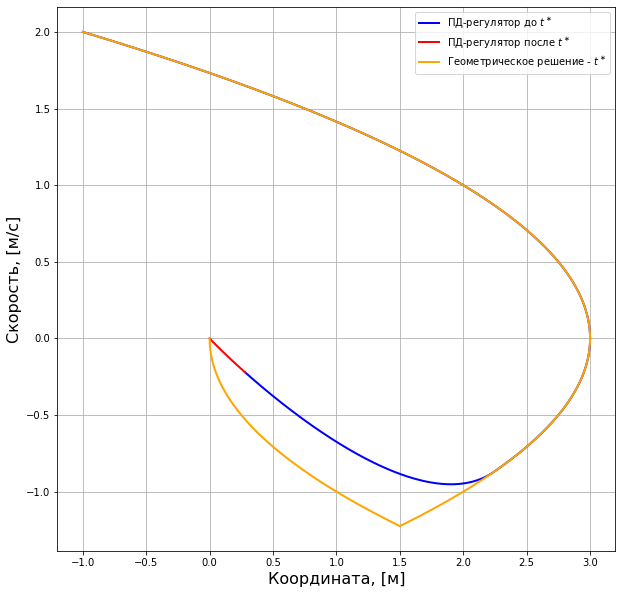

In [62]:
k_p = 1
k_d = 2

def u(x, v, t):
    u = -k_p * x - k_d * v
    if u > u_max:
        return u_max
    if u < -u_max:
        return -u_max
    return u

def f(y, t):
    y1, y2 = y
    return [y2, u(y1, y2, t)]

t = np.linspace(0, float(a_sol.full_time), 1000)
y0 = [x0, v0]  
w = odeint(f, y0, t)
p1 = w[:, 0]
p2 = w[:, 1]

t_late = np.linspace(float(a_sol.full_time), 2 * float(a_sol.full_time), 100)
y0_late = [p1[-1], p2[-1]]
w_late = odeint(f, y0_late, t_late)
p1_late = w_late[:, 0]
p2_late = w_late[:, 1]

# Рисуем результат:
fig = plt.figure(figsize=(10, 10))
plt.plot(p1, p2, color = 'blue', linewidth = 2, label=r'ПД-регулятор до $t^\ast$')
plt.plot(p1_late, p2_late, color = 'red', linewidth = 2, label=r'ПД-регулятор после $t^\ast$')
plt.plot(y1, y2, color = 'orange', linewidth = 2, label=r'Геометрическое решение - $t^\ast$')
plt.grid(True)
plt.xlabel("Координата, [м]")
plt.ylabel("Скорость, [м/с]")
plt.legend()
plt.show()